In [1]:
import sys
sys.path.append(sys.path[0] + '/bin')

In [2]:
import PyMorpionSolitaire

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Display module information:

In [4]:
# help(PyMorpionSolitaire)

Create a new game with default type (segment length 4, touching allowed, starting configuration 'cross'):

In [5]:
# game = PyMorpionSolitaire.Game('c', 4, False)
game = PyMorpionSolitaire.Game()
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                    X
X                                    X
X                                    X
X                                    X
X             O  O  O  O             X
X                                    X
X                                    X
X             O        O             X
X                                    X
X                                    X
X             O        O             X
X                                    X
X                                    X
X    O  O  O  O        O  O  O  O    X
X                                    X
X                                    X
X    O                          O    X
X                                    X
X                                    X
X    O                          O    X
X                                    X
X                                    X
X    O  O  O  O        O  O  O  O    X
X                                    X
X                       

In [6]:
game.getScore()

0

Play a specific move:

In [7]:
game.playByIndex(24)
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                    X
X                                    X
X                                    X
X                                    X
X             O  O  O  O             X
X               /                    X
X              /                     X
X             O        O             X
X            /                       X
X           /                        X
X          O  O        O             X
X         /                          X
X        /                           X
X    O  O  O  O        O  O  O  O    X
X      /                             X
X     /                              X
X    O                          O    X
X                                    X
X                                    X
X    O                          O    X
X                                    X
X                                    X
X    O  O  O  O        O  O  O  O    X
X                                    X
X                       

Play a move at random:

In [8]:
game.playAtRandom(1)
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                    X
X                                    X
X                                    X
X                                    X
X             O  O  O  O             X
X               /                    X
X              /                     X
X             O        O             X
X            /                       X
X           /                        X
X          O  O        O             X
X         /                          X
X        /                           X
X    O  O  O  O        O  O  O  O    X
X      /                             X
X     /                              X
X    O                          O    X
X                                    X
X                                    X
X    O                          O    X
X                                    X
X                                    X
X    O  O  O  O        O  O  O  O    X
X                      |             X
X                      |

Play several moves at random:

In [9]:
game.playAtRandom(10)
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                       X
X                                       X
X                                       X
X                                       X
X                         O             X
X                        /|             X
X                       / |             X
X                O--O--O--O--O          X
X                  /  /   |             X
X                 /  /    |             X
X                O  O     O             X
X               /  /      |             X
X              /  /       |             X
X             O  O        O             X
X            /  /         |             X
X           /  /          |             X
X       O  O  O  O        O  O  O  O    X
X       | /                        |    X
X       |/                         |    X
X       O                          O    X
X       |                          |    X
X       |                          |    X
X       O                        

Play at random until no more moves are possible:

In [10]:
game.playAtRandom()
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                          X
X                                          X
X                                          X
X                                          X
X                         O                X
X                        /|                X
X                       / |                X
X                O--O--O--O--O             X
X                | /  / \ |                X
X                |/  /   \|                X
X                O  O     O                X
X               /| /      |\               X
X              / |/       | \              X
X             O  O        O  O             X
X            /  /|        |   \            X
X           /  / |        |    \           X
X    O--O--O--O--O        O--O--O--O--O    X
X       | /    \ |       /       \ |       X
X       |/      \|      /         \|       X
X       O        O     O           O       X
X       |         \   /            |       X
X       |

Undo one move:

In [11]:
game.undo()
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                          X
X                                          X
X                                          X
X                                          X
X                         O                X
X                        /|                X
X                       / |                X
X                O--O--O--O--O             X
X                | /  / \ |                X
X                |/  /   \|                X
X                O  O     O                X
X               /| /      |\               X
X              / |/       | \              X
X             O  O        O  O             X
X            /  /|        |   \            X
X           /  / |        |    \           X
X    O--O--O--O--O        O--O--O--O--O    X
X       | /    \ |               \ |       X
X       |/      \|                \|       X
X       O        O                 O       X
X       |         \                |       X
X       |

Undo more moves:

In [12]:
game.undo(15)
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                    X
X                                    X
X                                    X
X                                    X
X                      O             X
X                     /|             X
X                    / |             X
X             O--O--O--O--O          X
X               /  /   |             X
X              /  /    |             X
X             O  O     O             X
X            /  /      |             X
X           /  /       |             X
X          O  O        O             X
X         /  /         |             X
X        /  /          |             X
X    O  O  O  O        O  O  O  O    X
X    | /                             X
X    |/                              X
X    O                          O    X
X    |                               X
X    |                               X
X    O                          O    X
X    |                               X
X    |                  

Generate several games and plot the distribution of scores using defferent algorithms:

In [13]:
n = 100000
mc_score_count = np.array([0 for _ in range(150)])
for _ in tqdm(range(n)):
    game.restart()
    game.playAtRandom()
    mc_score_count[game.getScore()] += 1
assert n == mc_score_count.sum()
mc_freq = mc_score_count / n

100%|█████████████████████████████████| 100000/100000 [00:23<00:00, 4269.53it/s]


In [14]:
n = 1000
nested_mc_score_count = np.array([0 for _ in range(150)])
for _ in tqdm(range(n)):
    game.restart()
    game.playNestedMC(1)
    nested_mc_score_count[game.getScore()] += 1
assert n == nested_mc_score_count.sum()
nested_mc_freq = nested_mc_score_count / n

100%|███████████████████████████████████████| 1000/1000 [01:48<00:00,  9.24it/s]


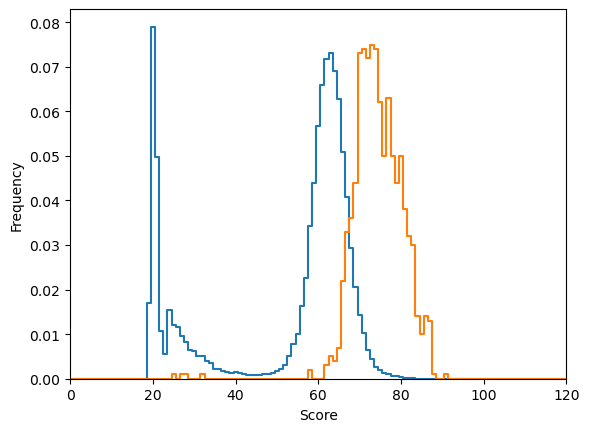

In [15]:
bins = [i - 0.5 for i in range(150)]
plt.step(bins, mc_freq)
plt.step(bins, nested_mc_freq)
plt.xlim(0, 120)
plt.ylim(0)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [17]:
game.restart()
game.playNestedMC(2)
game.print()


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
X                                                X
X                                                X
X                                                X
X                                                X
X                O  O--O--O--O--O                X
X                 \/|\/   |\/ \/|                X
X                 /\|/\   |/\ /\|                X
X                O--O--O--O--O  O                X
X               /|\/|\/|\/|\/|\/|\               X
X              / |/\|/\|/\|/\|/\| \              X
X             O--O--O--O--O--O--O--O--O          X
X            /| /|\/|\/|\/|\/|\ |\  \            X
X           / |/ |/\|/\|/\|/\| \| \  \           X
X       O--O--O--O--O--O--O--O--O--O--O--O--O    X
X        \/|\/| /|\/|\/|\/|\/|\ |\  \/|\/  /     X
X        /\|/\|/ |/\|/\|/\|/\| \| \ /\|/\ /      X
X       O--O--O--O--O  O  O--O--O--O--O  O       X
X        \ |\/|\ |\/ \/|\/|\/|\/|\/|\/| /        X
X         \|/\| \|/\ /\|/\|/\|